In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [22]:
import h5py
from scipy.stats import pearsonr

In [56]:
def plot_true_pred(target='residuals', model_name='ridge', cvfold=0, trait='trait1'):
    predictions = {}
    with h5py.File('output/mixed_model/{0}/{1}/{2}/{3}/predictions'.format(target, 
                                                                           model_name, trait, cvfold), 'r') as f:
        for key in f.keys():
            if key == 'cv_metrics':
                predictions['cv_metrics'] = {}
                for key2 in f['cv_metrics'].keys():
                    predictions['cv_metrics'][key2] = f[key][key2][:]
            else:
                predictions[key] = f[key][:]
    with h5py.File('output/fastlmm/cv_index.cross', 'r') as f:
        train_index = f['/%d/train'%cvfold][:]
        test_index = f['/%d/test'%cvfold][:]
        training_index = np.union1d(train_index, test_index)
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    x, y = predictions['y_true'][training_index], predictions['y_pred'][training_index]
    ax[0].scatter(x, y, s=3)
    ax[0].set_title('All samples (PCC=%f)'%pearsonr(x, y)[0])

    x, y = predictions['y_true'][train_index], predictions['y_pred'][train_index]
    ax[1].scatter(x, y, s=3)
    ax[1].set_title('Training samples (PCC=%f)'%pearsonr(x, y)[0])

    x, y = predictions['y_true'][test_index], predictions['y_pred'][test_index]
    ax[2].scatter(x, y, s=3)
    ax[2].set_title('Test samples (PCC=%f)'%pearsonr(x, y)[0])
    return predictions

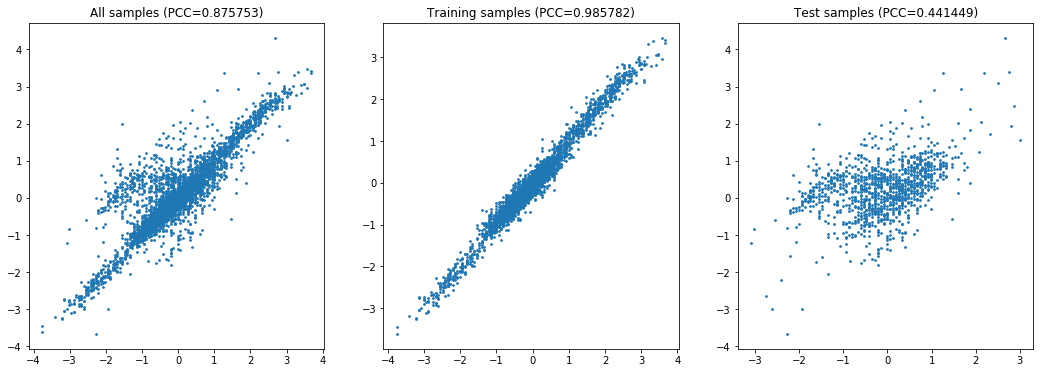

In [42]:
plot_true_pred(target='mixed_model_cv', model_name='ridge', trait='trait1')

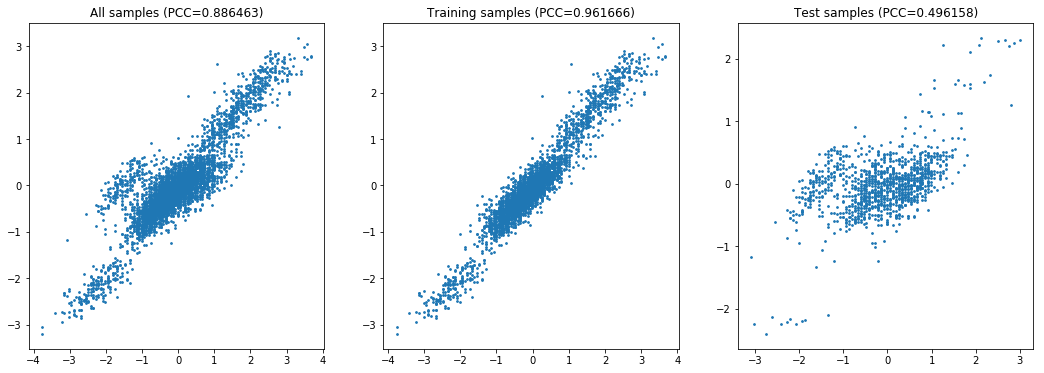

In [43]:
plot_true_pred(target='residuals', model_name='ridge', trait='trait1')

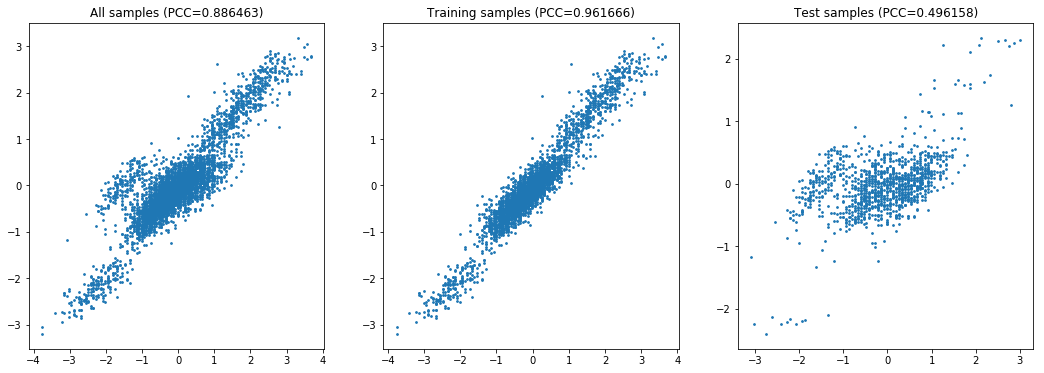

In [80]:
predictions = plot_true_pred(target='residuals', model_name='ridge_cv', trait='trait1')

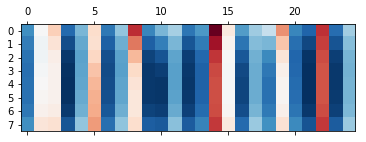

In [81]:
fig, ax = plt.subplots()
ax.matshow(predictions['cv_metrics']['mse'], cmap=cm.RdBu_r)

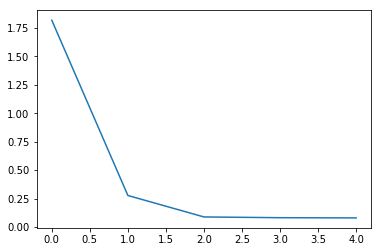

In [92]:
plot(predictions['cv_metrics']['mse'].mean(axis=1))

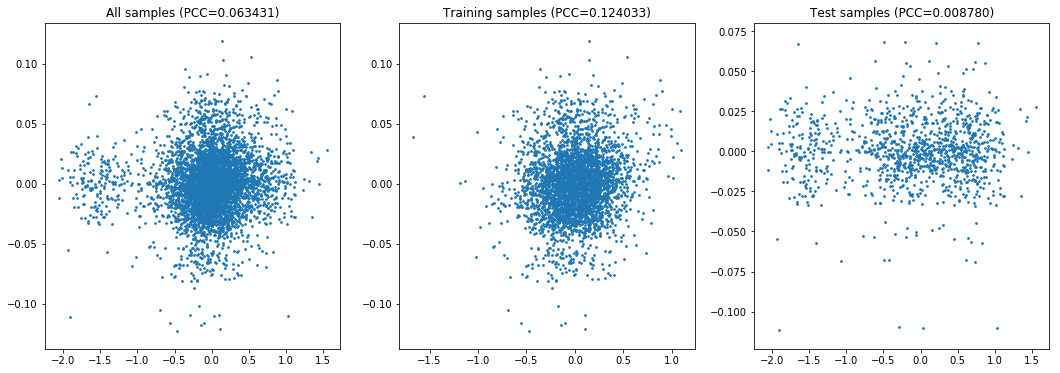

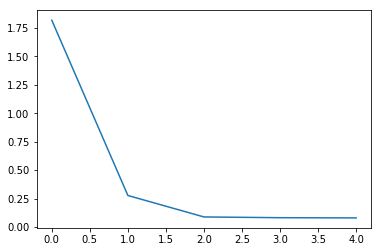

In [91]:
predictions = plot_true_pred(target='predict_residuals', model_name='ridge', trait='trait1')
fig, ax = plt.subplots()
ax.plot(predictions['cv_metrics']['mse'].mean(axis=1))

In [88]:
predictions['alpha']

array([  1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04,   1.00000000e+05])

In [ ]:
plot_true_pred('residuals', trait='trait1')

In [12]:
with h5py.File('output/fastlmm/cv_index.cross', 'r') as f:
    train_index = f['/0/train'][:]
    test_index = f['/0/test'][:]

In [16]:
print train_index.shape
print test_index.shape

(3610,)
(1144,)


In [39]:
alphas = 10.0**np.arange(-3, 6)
alphas

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05])

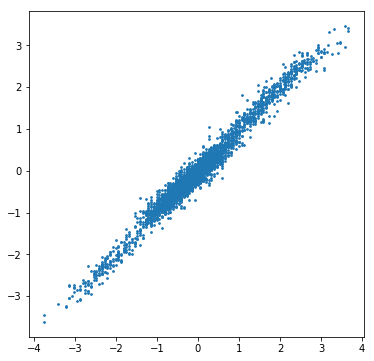

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(predictions['y_true'][train_index], predictions['y_pred'][train_index], s=3)

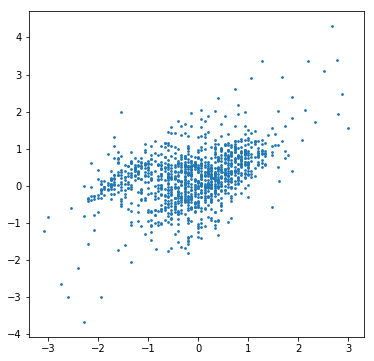

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(predictions['y_true'][test_index], predictions['y_pred'][test_index], s=3)